# Домашняя работа №2

In [29]:
import pandas as pd
from scipy import stats
import numpy as np
import math
import random
import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

#your answer here   
Генеральная совокупность, все объекты соответсвующие какому-то правилу или условию.
Выборка это подмножество генеральной совокупности, набор случано отоборанных обектов из генеральной совокупности.

- Если размер выборки больше 200, то такая выборка является репрезентативной?

#your answer here    
Реперезентативность выборки не всегда зависит от количества элементов в ней. Выборка должна охватить все возможные свойства объектов генеральной совкупности. Например, если мы будем исследовать зарплаты в России, то не коррреткным будет взять 200 человек из Москвы, такая выборка не будет репрезентативной

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

#your answer here   
a) Длина волос футболистов Франции  
б) Длина волос мужчин во Франции в возрасте от 18 до 40   
в) Длина волос футболистов на ЧМ-2018

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

#your answer here   
Например,     
a)узнавать вес при рождении n детей, родившихся в Волгограде в годы с 2009 по 2018    
б)узнавать вес при рождении n/2 мальчиков и n/2 девочек, родившихся в Волгограде в годы с 2009 по 2018

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


#your code here   
У равномерного распредления нет моды, т.к. вероятности появления любого числа равновероятны

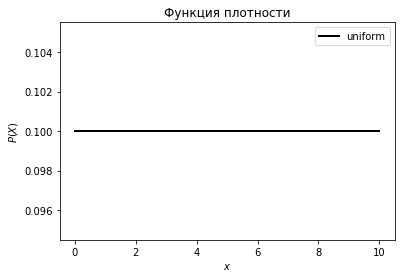

In [32]:
x=np.linspace(0,10,10)
fig, ax = plt.subplots(1, 1)
ax.plot(x,stats.uniform(0,10).pdf(x),'k-', lw=2)
ax.set_title("Функция плотности")
ax.set_xlabel('$x$')
ax.set_ylabel('$P(X)$')
ax.legend(["uniform"])

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [48]:
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = sorted(sample)[24]
mean = sample.mean()


#your code here
overshoot =100 
type(sample)
sample_with_overshoot =np.append(sample,overshoot)
new_med =sorted(sample_with_overshoot)[25]
new_mean = sample_with_overshoot.mean()

print("old_mean {} new_mean {}".format(mean,new_mean))
print("old_med {} new_med {}".format(med,new_med))

old_mean 4.247040023389791 new_mean 6.088443099863064
old_med 3.850005760225394 new_med 3.8528498093713712


Среднее наиболее неустойчиво при выбросах. Т.к. при добавлении выброса, медиана сдвинется на один элемент вправо (если добавлен один выброс) или влево, в то время как матожидание значительно изменится.   

- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [64]:
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
sample_with_c = sample+0.5
sample_mult_c=sample*0.5
#your code here
mean = sample.mean()
mean_with_c = sample_with_c.mean()
mean_mult_c = sample_mult_c.mean()
print("mean {} mean_with_c {} mean_mult_c {}".format(mean,mean_with_c,mean_mult_c))


mean 2.1 mean_with_c 2.6 mean_mult_c 1.05


При добавлении констатнты "с" среднее вырасло на эту константу, при умножении на константу среднее изменилось в "с" раз, 
т.к. матожидание это линейнная функция.

- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [26]:
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()
#your code here
overshoot = 15
sample_with_overshoot = np.append(sample,overshoot)
new_var =sample_with_overshoot.var()
print("old_var {} new_var {}".format(var,new_var))

old_var 1.7118001272995373 new_var 3.554334611095796


Диспресия изменится, т.к. изменилось среднее

- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s^2, \bar{X}+s^2)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [25]:
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)

per_75=np.percentile(sample,75)
per_25=np.percentile(sample,25)
IQR=per_75-per_25
x_avg=sample.mean()

R=(x_avg+sample.var())-(x_avg-sample.var())
print("IQR {} R {}".format(IQR,R))
#your code here

IQR 1.3050013814000754 R 1.913511336641358


$(\bar{X}-s, \bar{X}+s)$ шире, т.к. там ~68% значения, когда в IQR только 50%

## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

Статистика — измеримая числовая функция от выборки, не зависящая от неизвестных параметров распределения элементов выборки. Посчитаем медиану, она соответсвует 50 перцентилю.

In [35]:
beta_rv = stats.beta(1,3)
#your code here
sample=beta_rv.rvs(100)
median=np.percentile(sample,50)
print("Медиана выборки равна: {}".format(median))

Медиана выборки равна: 0.1626762973982923


- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

In [90]:
gamma_rv = stats.gamma(2,2)
sample=gamma_rv.rvs(50)
#your code here
mean =sample.mean()
var =sample.var()
med =np.percentile(sample,50)
print("mean {} var {} med {}".format(mean,var,med))


mean 3.9686675415337196 var 1.948020036995873 med 3.5772457815171688


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

ВЫборочное среднее равно: 4.998336153151808


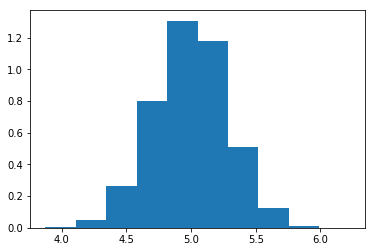

In [46]:
#your code here
norm_rv = stats.norm(5,2)
var=[]
mean=[]
for i in range(10000):
    sample = norm_rv.rvs(50)
    #your code here
    #var.append(sample.var())
    mean.append(sample.mean())
plt.hist(mean,density=True)
print("ВЫборочное среднее равно: {}".format(np.array(mean).mean()))

$\bar{X}$ имеет нормально распределение со средним выборки  близким ко среднему выборки (5)

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

ВЫборочное среднее равно: 5.02528321074943


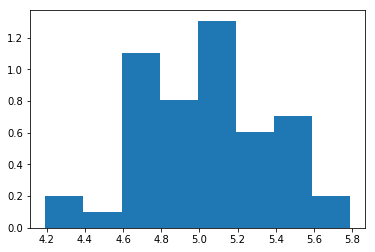

In [58]:
#your code here
#your code here
norm_rv = stats.norm(5,2)
var=[]
mean=[]
for i in range(50):
    sample = norm_rv.rvs(30)
    #your code here
    #var.append(sample.var())
    mean.append(sample.mean())
plt.hist(mean,bins=8,density=True)
print("ВЫборочное среднее равно: {}".format(np.array(mean).mean()))

Достаточно уменьшить кол-во выбранных значений из первончоалной выборки, чтобы ЦПТ не выполнялось.

- Сделайте z-преобразование для данного распределения

In [74]:
expon_rv = stats.expon(3)
sample = expon_rv.rvs(1000)
print("Initial var {} Initial mean {}".format(sample.var(),sample.mean()))
new_rvs=(sample-sample.mean())/sample.var()

print("After Z-transform var {}  mean {}".format(new_rvs.var(),new_rvs.mean()))

Initial var 1.0561584904649193 Initial mean 3.9626936554397005
After Z-transform var 0.946827591718551  mean -1.4210854715202004e-17


## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [50]:
#your code here
chi2_rv=stats.chi2(10)
var=[]
sample = chi2_rv.rvs(10000)
se=np.array(sample).var()/math.sqrt(10000)
print("10 +- {}".format(1.96*se))

10 +- 0.39025765837828313


- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [5]:
#your code here
t_rv=stats.t(15)
print("90% {} 95%{}".format(t_rv.ppf(.9),t_rv.ppf(.95)))

90% 1.3406056078504547 95%1.7530503556925547


Доверительный интервал доверия шире 95%, т.к. содержит 95% значений выборки

- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [82]:
norm_rv = stats.norm(0, 2)
#your code here
x1=norm_rv.rvs(5000)
x2=norm_rv.rvs(10000)
print("CI for x1 {} CI for x2 {}".format(np.percentile(x1,0.9),np.percentile(x2,0.9)))

CI for x1 -4.7285736607198725 CI for x2 -4.700123309582699


Я не понял, несмотря на то, что кол-во чисел в выборке очень большое, я получаю разный значения, когда-то CI1 больше, 
когда-то CI2 

- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

In [ ]:
#your answer here
Мы допустили ошибку второго рода (false negative). Принята неправильная нулевая гипотеза.

#### Какие рассуждения относительно p-value верные?

- Если p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем сильнее получаемые различия.


In [ ]:
#your answer here
1) Не верно, это верно наоборот. Если мы точно знаем, что верная нулевая гипотеза, то она верна с полученной 
вероятностью  
2) Нет, это значит, только чтомы не можем отвергнуть нулевую гипотезу
3) Нет, это не верно

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99\% доверительный интервал хорошей оценкой в общем случае?

In [ ]:
#your answer here
Если нулевую гипотезу отклонять рискованно, необходимо взять более низки порог 0.01. Да, т.к. он 
покрывает большое кол-во значений.

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

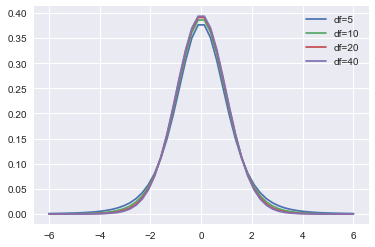

In [91]:
#your code here
t_rv5=stats.t(5)
t_rv10=stats.t(10)
t_rv20=stats.t(20)
t_rv40=stats.t(40)

x=np.linspace(-6,6)
plt.plot(x,t_rv5.pdf(x))
plt.plot(x,t_rv10.pdf(x))
plt.plot(x,t_rv20.pdf(x))
plt.plot(x,t_rv40.pdf(x))
plt.legend(["df=5","df=10","df=20","df=40"])

In [ ]:
С увеличением кол-ва степеней свободы, распредедение стьюдента стремится к нормальному. Чем меньше степеней свободы, 
тем хвосты выше (дисперсия больше)

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

In [97]:
#your code here
x1=[i for i in range(0,100)]
y1=[-x for x in x1]
corr, p_value=stats.pearsonr(x1,y1)
print(corr)

-1.0


- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

0.0


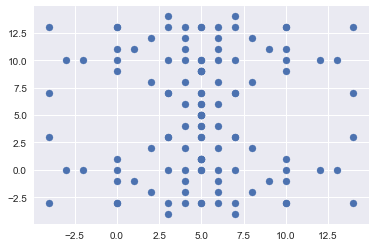

In [129]:
#your code here
#your code here
xmean=5
ymean=5
x=[]
y=[]
for i in range(0,30):
    rnd1=random.randint(0,9)
    rnd2=random.randint(0,9)
    x.append(xmean-rnd1)
    y.append(ymean-rnd2)
    x.append(xmean-rnd1)
    y.append(ymean+rnd2)
    x.append(xmean+rnd1)
    y.append(ymean+rnd2)
    x.append(xmean+rnd1)
    y.append(ymean-rnd2)  
plt.scatter(x,y)
corr, p_value=stats.pearsonr(x,y)
print(corr)

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [137]:
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))
ordered_sample=sorted(sample)
rank_sample_1=0
rank_sample_2=0
for i in range (0,len(ordered_sample)):
    if ordered_sample[i] in sample_1:
        rank_sample_1+=i
    else: 
        rank_sample_2+=i
print("Ранг выборки 1 {} Ранг выборки 2 {}".format(rank_sample_1,rank_sample_2))
#your code here

Ранг выборки 1 9411 Ранг выборки 2 10489
